<a href="https://colab.research.google.com/github/Nardy07/NIDS/blob/main/try25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

In [ ]:
X_selected = pd.read_csv('X_selected.csv')
y = pd.read_csv('y.csv')

In [ ]:
X_selected

,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Max,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,Pkt_Size_Avg,Bwd_Seg_Size_Avg,Init_Bwd_Win_Byts
0,-0.370661,-0.361533,-0.370505,2.263739,4.590637,2.995018,0.471796,4.347100,-0.189354,2.477885
1,-0.317948,-0.360179,-0.329488,7.119662,5.353110,4.297869,0.980947,5.031255,6.384897,2.420659
2,-0.378125,-0.359461,-0.372226,0.006001,-0.035646,0.085284,-0.047994,-0.041103,0.091383,2.420659
3,-0.380181,-0.363406,-0.374652,-0.164223,-0.281857,-0.233345,-0.053107,-0.296156,-0.249572,2.420615
4,-0.372799,-0.359629,-0.372632,0.528413,1.018069,0.871613,0.008384,0.970252,1.308591,2.420659
...,...,...,...,...,...,...,...,...,...,...
205162,-0.369667,-0.323059,-0.360782,-0.158086,-0.269257,-0.217665,-0.053094,-0.281918,-0.232329,-0.415265
205163,-0.369778,-0.350099,-0.361869,-0.153017,-0.244059,-0.204767,-0.053066,-0.257822,-0.242182,-0.415265
205164,-0.378771,-0.360701,-0.372962,-0.156219,-0.248989,-0.208679,-0.053076,-0.262389,-0.222583,-0.408592
205165,-0.369617,-0.322867,-0.360776,-0.158086,-0.269257,-0.217665,-0.053094,-0.281918,-0.232329,-0.415265


In [ ]:
y

,Abnormal,Normal
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
205162,True,False
205163,True,False
205164,True,False
205165,True,False


In [ ]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path

# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X_selected,y, test_size=0.25, random_state=42)

In [ ]:
# Reshape input data for LSTM
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:

lst = Sequential([LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True),LSTM(64),Dropout(0.2),Dense(512,activation='relu'),Dense(y_train.shape[1], activation='sigmoid')])


In [ ]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
lst.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 64)             19200     
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 512)               33280     
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 86530 (338.01 KB)
Trainable params: 86530 (338.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = lst.fit(X_train, y_train, epochs=100, batch_size=64,validation_data=(X_test,y_test))

Epoch 1/100
2405/2405 [==============================] - 23s 8ms/step - loss: 0.0439 - accuracy: 0.9892 - val_loss: 0.0347 - val_accuracy: 0.9933
Epoch 2/100
2405/2405 [==============================] - 17s 7ms/step - loss: 0.0326 - accuracy: 0.9932 - val_loss: 0.0321 - val_accuracy: 0.9934
Epoch 3/100
2405/2405 [==============================] - 17s 7ms/step - loss: 0.0320 - accuracy: 0.9931 - val_loss: 0.0303 - val_accuracy: 0.9928
Epoch 4/100
2405/2405 [==============================] - 18s 7ms/step - loss: 0.0306 - accuracy: 0.9932 - val_loss: 0.0299 - val_accuracy: 0.9940
Epoch 5/100
2405/2405 [==============================] - 18s 8ms/step - loss: 0.0299 - accuracy: 0.9933 - val_loss: 0.0290 - val_accuracy: 0.9942
Epoch 6/100
2405/2405 [==============================] - 18s 7ms/step - loss: 0.0291 - accuracy: 0.9935 - val_loss: 0.0278 - val_accuracy: 0.9942
Epoch 7/100
2405/2405 [==============================] - 20s 8ms/step - loss: 0.0281 - accuracy: 0.9936 - val_loss: 0.0258 -

In [ ]:
# predicting target attribute on testing dataset
test_results = lst.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

1603/1603 [==============================] - 4s 2ms/step - loss: 0.0125 - accuracy: 0.9981
Test results - Loss: 0.012489765882492065 - Accuracy: 99.8128354549408%


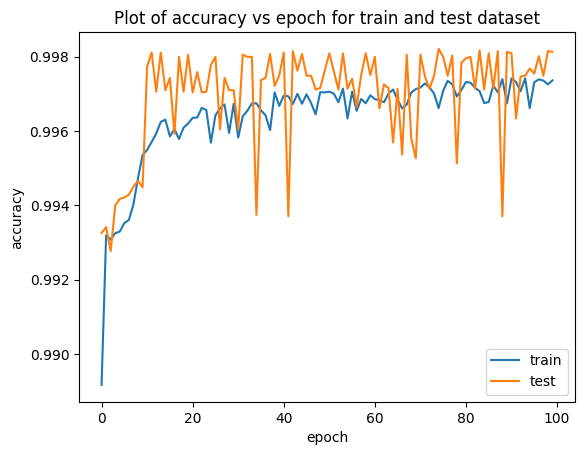

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('lstm_binary_accuracy.png')
plt.show()

In [ ]:
# Make predictions
y_pred = lst.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

1603/1603 [==============================] - 4s 3ms/step


In [ ]:
y_test_labels = y_test.idxmax(axis=1)
y_pred_labels = pd.Series(y_pred).map({i: label for i, label in enumerate(y.columns)})

Confusion Matrix:
[[34291     8]
 [   88 16905]]


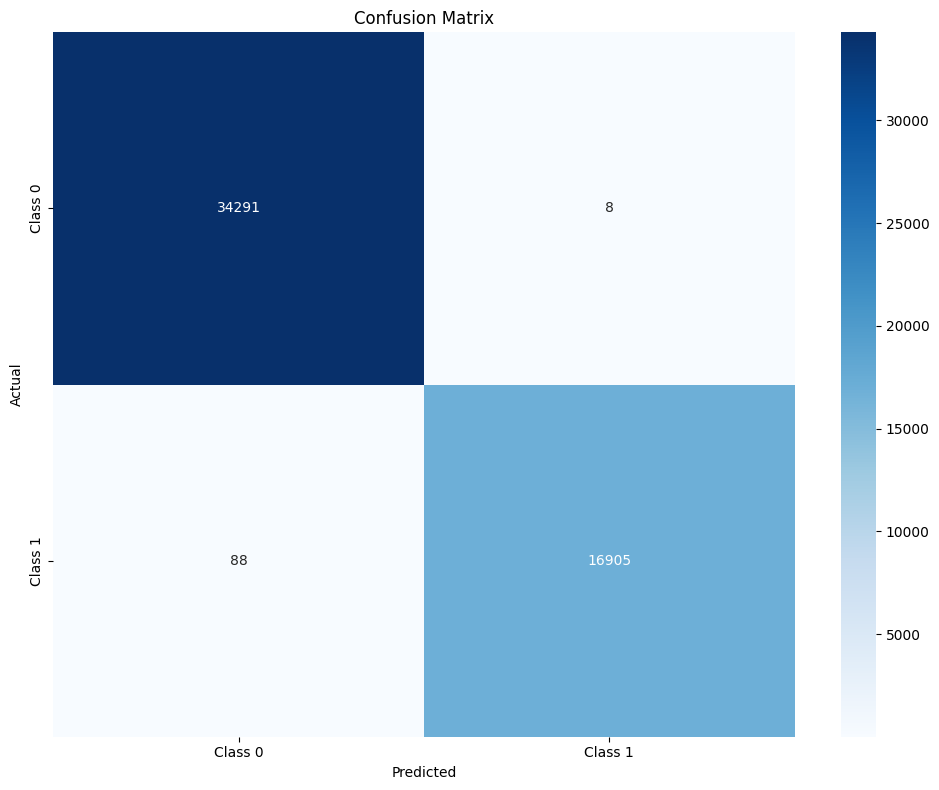

In [ ]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class {}'.format(i) for i in range(conf_matrix.shape[0])], yticklabels=['Class {}'.format(i) for i in range(conf_matrix.shape[0])])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
#plt.savefig('confusion_matrix.png')
plt.show()

TESTING PHASE

In [ ]:
test=pd.read_csv('test_all_bin.csv')

In [ ]:
test

,bwd_iat_tot,bwd_iat_mean,bwd_iat_max,pkt_len_max,pkt_len_mean,pkt_len_std,pkt_len_var,pkt_size_avg,bwd_seg_size_avg,init_bwd_win_byts
0,-0.373896,-0.428796,-0.343428,0.025937,0.249922,0.108420,-0.017971,0.249922,0.631680,-0.070120
1,-0.373896,-0.428796,-0.343428,0.025937,0.249922,0.108420,-0.017971,0.249922,0.631680,-0.070120
2,-0.373896,-0.428796,-0.343428,0.082072,0.560920,0.245070,-0.016780,0.560920,0.995939,14.264759
3,-0.373896,-0.428796,-0.343428,0.082072,0.560920,0.245070,-0.016780,0.560920,0.995939,14.264759
4,-0.373896,-0.428796,-0.343428,0.025937,0.249922,0.108420,-0.017971,0.249922,0.631680,-0.070120
...,...,...,...,...,...,...,...,...,...,...
73982,2.836026,1.685456,1.130065,-0.039062,-0.089348,-0.059774,-0.018492,-0.089348,0.599301,-0.070120
73983,2.836075,1.685488,1.130149,-0.039062,-0.089348,-0.059774,-0.018492,-0.089348,0.599301,-0.070120
73984,2.836124,1.685521,1.130166,-0.039062,-0.089348,-0.059774,-0.018492,-0.089348,0.599301,-0.070120
73985,2.836185,1.685561,1.130168,-0.039062,-0.089348,-0.059774,-0.018492,-0.089348,0.599301,-0.070120


In [ ]:
X_val = test.values.reshape((test.shape[0], 1, test.shape[1]))

In [ ]:
X_val

array([[[-0.37389569, -0.42879611, -0.34342789, ...,  0.24992219,
          0.63167999, -0.07011968]],

       [[-0.37389569, -0.42879611, -0.34342789, ...,  0.24992219,
          0.63167999, -0.07011968]],

       [[-0.37389569, -0.42879611, -0.34342789, ...,  0.56092018,
          0.99593934, 14.26475894]],

       ...,

       [[ 2.83612395,  1.68552073,  1.13016555, ..., -0.08934834,
          0.59930138, -0.07011968]],

       [[ 2.83618454,  1.68556064,  1.13016771, ..., -0.08934834,
          0.59930138, -0.07011968]],

       [[ 2.8360851 ,  1.68549515,  1.13017041, ..., -0.08934834,
          0.59930138, -0.07011968]]])

In [ ]:
y_classes = (lst.predict(X_val)>0.5).astype('int32')

2313/2313 [==============================] - 6s 2ms/step


In [ ]:
y_classes

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=int32)

In [ ]:
# Convert predictions to labels using index_to_label mapping
y_class_l=np.argmax(y_classes, axis=1)
index_to_label = {0: 'Normal', 1: 'Abnormal'}  # Update with your actual mapping
predicted_labels = [index_to_label[idx] for idx in y_class_l]

# Create a DataFrame to store the predictions along with the input data (optional)
predicted_data = pd.DataFrame({'Predicted_Label': predicted_labels})
predicted_data = pd.concat([test, predicted_data], axis=1)

# Print or inspect the predicted data
print(predicted_data.head())

   bwd_iat_tot  bwd_iat_mean  bwd_iat_max  ...  bwd_seg_size_avg  init_bwd_win_byts  Predicted_Label
0    -0.373896     -0.428796    -0.343428  ...          0.631680          -0.070120         Abnormal
1    -0.373896     -0.428796    -0.343428  ...          0.631680          -0.070120         Abnormal
2    -0.373896     -0.428796    -0.343428  ...          0.995939          14.264759         Abnormal
3    -0.373896     -0.428796    -0.343428  ...          0.995939          14.264759         Abnormal
4    -0.373896     -0.428796    -0.343428  ...          0.631680          -0.070120         Abnormal

[5 rows x 11 columns]


In [ ]:
predicted_data['Predicted_Label'].value_counts()

Abnormal    61869
Normal      12118
Name: Predicted_Label, dtype: int64

In [ ]:
lst.save('dense_added_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
